In [111]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.datasets import make_classification
from sklearn import neighbors
%matplotlib inline

In [186]:
NumOfClasses = 4
Size = 200
(data, Y) = make_classification(n_samples = Size, n_features = 2, n_informative=2, 
                           n_redundant=0, n_classes=NumOfClasses, n_clusters_per_class= 1)
classes = []
for n in range(0, NumOfClasses):
    classes.append([])
    for i in range(0, len(data)):
        if Y[i] == n:
            classes[n].append(data[i])
    classes[n] = np.array(classes[n])

In [202]:
NumNeighbors = 7
clf = neighbors.KNeighborsClassifier(NumNeighbors, 'uniform')
clf.fit(data, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [206]:
x_min = data[:,0].min() - 1
x_max = data[:,0].max() + 1
y_min = data[:,1].min() - 1
y_max = data[:,1].max() + 1
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

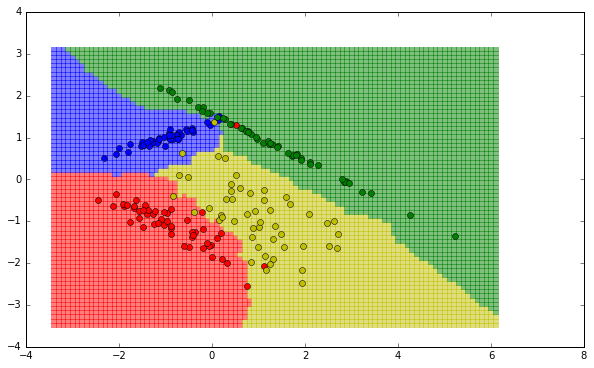

In [207]:
ColorMap = colors.ListedColormap(["r", "b", "y", "g"])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,6))
plt.pcolormesh(xx, yy, Z, cmap = ColorMap, alpha = 0.5)
color = ['r', 'b', 'y', 'g']
for n in range(0, NumOfClasses):
    plt.plot(classes[n][:,0], classes[n][:,1], 'ro', color = color[n])

In [191]:
from sklearn.cross_validation import cross_val_score

optimum: k =  7


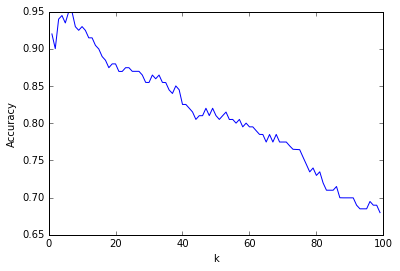

In [196]:
Num = np.arange(1, 100, 1)
plt.figure()
plt.xlabel("k")
plt.ylabel("Accuracy")
Scores = []
for n in Num:
    clf = neighbors.KNeighborsClassifier(n, 'uniform')
    Scores.append(cross_val_score(clf, data, Y, cv = 5).mean())
plt.plot(Num, Scores)
print "optimum: k = ", Num[np.argmax(Scores)]